In [1]:
from process.dataset import prepare_dataset

In [2]:
path_data="./pycharm_issues.json"

## Prepare data

In [3]:
train_data, clear_data, topic_model =prepare_dataset(path_data)

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

/Users/Olga.Lavrichenko/opt/anaconda3/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")
/Users/Olga.Lavrichenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Frequency 

In [6]:
import string
from collections import Counter
from wordcloud import WordCloud
import nltk
import pymorphy2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import plotly.express as px
import numpy as np





def plot_wordcloud(documents):
    keywords_list = []

    for doc in documents:
        keywords_list.extend(doc.split(" "))
        

    keywords = Counter(keywords_list)
    x, y = np.ogrid[:1200, :1200]

    mask = (x - 600) ** 2 + (y - 600) ** 2 > 590 ** 2
    mask = 255 * mask.astype(int)
    word_cloud = WordCloud(collocations=True, background_color='white',
                           max_words=50, width=1200, height=1200,
                           mask=mask, contour_width=3, contour_color='black', ).generate_from_frequencies(
        dict(keywords))

    fig = px.imshow(word_cloud, title=f"Main words from description")
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)

    fig.show()






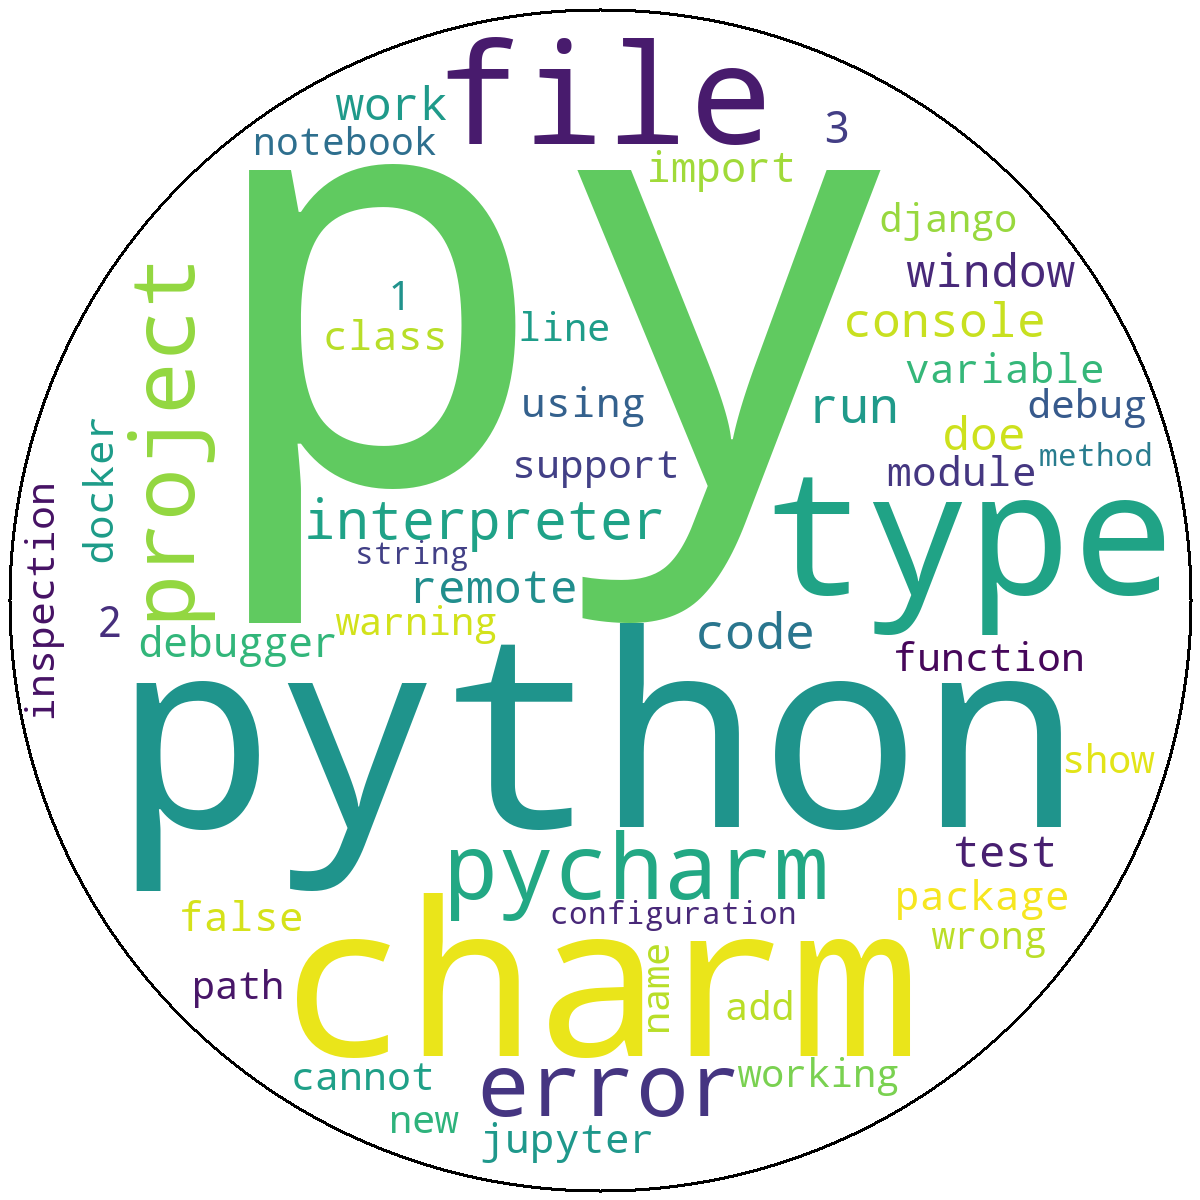

In [7]:
plot_wordcloud(clear_data)